In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns

In [146]:
df_train = pd.read_csv('./dataSets/Train_set16dB.csv', index_col=0)
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,H0_0,H0_1,H0_2,H0_3,H0_4,H0_5,H0_6,H0_7,H0_8,H0_9,H1_0,H1_1,H1_2,H1_3,H1_4,H1_5,H1_6,H1_7,H1_8,H1_9,H2_0,H2_1,H2_2,H2_3,H2_4,H2_5,...,H6_7,H6_8,H6_9,H7_0,H7_1,H7_2,H7_3,H7_4,H7_5,H7_6,H7_7,H7_8,H7_9,H8_0,H8_1,H8_2,H8_3,H8_4,H8_5,H8_6,H8_7,H8_8,H8_9,H9_0,H9_1,H9_2,H9_3,H9_4,H9_5,H9_6,H9_7,H9_8,H9_9,answer0,answer1,answer2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-10.335372,2.997734,1.952740,1.228318,9.620171,9.062561,3.508236,16.645063,10.224642,5.529175,3.132327,-0.882066,1.094540,0.595042,1.441589,-0.500517,-0.960842,-2.024320,0.506006,-0.005859,0.990749,0.760409,2.031397,1.707384,0.298447,-0.354809,0.371266,-1.641184,0.388642,-1.812619,0.588674,-1.493128,0.597485,0.122415,-0.756829,0.231450,...,0.516310,-0.364114,0.037339,0.178162,0.221424,0.339083,2.053599,-1.952940,-0.789705,-1.400312,-1.553642,-2.627971,-0.535281,-1.536520,1.895640,1.005290,1.092209,-0.099502,0.567479,-0.277852,-1.043183,-0.162490,-1.087243,-2.601541,-0.141095,0.123542,-0.587845,-0.101763,1.756181,0.237538,0.577965,-0.150857,1.836897,3.829775,3.964695,4.627314
1,8.510624,4.958872,3.755672,-7.535229,-1.923764,-2.676272,2.014852,-7.994846,-9.104957,-0.172496,-0.578126,1.613414,0.185448,-1.989300,1.463584,0.855530,-0.544456,0.703506,0.659622,1.998773,0.228891,0.632591,-1.505910,0.234439,0.772245,0.382263,0.635178,0.462630,0.148089,-0.835185,-0.116274,1.774198,0.687921,1.616471,0.139065,0.372650,...,-0.427604,0.717184,-1.053658,-1.410788,-1.231470,1.158461,-0.796995,-0.079041,-0.478456,-1.176194,-1.126223,0.323112,0.584198,0.678382,-0.384214,-0.167410,0.944310,-0.680849,1.720783,1.831974,-2.099917,0.197591,0.118908,0.632170,1.219085,0.928942,-0.038206,-0.288198,-0.934049,0.654524,-1.038545,-0.495192,-0.152958,2.425901,3.165868,3.436134
2,12.799403,6.804684,2.343288,-0.849616,-1.316148,-10.591614,5.472562,4.664954,-16.676164,1.330153,-0.650656,0.713999,-0.409311,-0.178052,-2.444105,-1.459093,0.597471,-0.049138,0.382510,1.702263,1.880436,-0.053249,1.828522,-0.180769,-1.848922,-0.880614,0.107218,1.087159,1.625391,0.035869,1.045658,0.823651,-0.816138,0.400313,-1.222842,-0.595847,...,-0.421346,-0.095837,1.150926,-0.207204,1.142358,-1.669511,-0.459300,-1.957388,-1.132465,-2.112978,-1.419929,-1.390119,0.196957,0.288225,-1.088314,0.400937,1.313121,0.983825,-1.639352,1.349174,-1.200680,-0.745586,-1.061251,0.448276,-1.600931,-0.709754,0.017824,0.670232,0.187505,-0.917862,0.410080,0.205185,1.494297,2.286627,3.951375,4.125023
3,6.464935,1.634753,0.878756,0.641307,1.958098,8.466972,-3.609932,13.430840,11.635386,12.120604,0.177410,-0.037084,1.251808,0.892684,-1.264821,-1.201936,0.023023,0.881178,1.037277,-0.392852,-0.343003,0.389997,-0.118400,-0.418441,1.093002,1.994490,-1.057772,0.113173,0.344710,-0.433479,0.142987,0.795940,0.419600,0.389483,1.000101,0.451761,...,-0.752054,-0.046981,-0.094120,2.178089,0.326299,-0.521666,-1.255047,1.081575,-1.419923,-0.035137,1.518605,2.391863,0.359846,0.186519,-1.528992,0.703650,-1.173536,1.711664,-2.158105,-0.402078,-0.667789,0.385345,1.149075,0.905331,0.404538,-0.095653,0.199083,0.705416,-1.468923,-1.595116,-0.226555,1.170885,-0.020808,1.941790,2.304218,3.017347
4,3.365738,-10.680749,3.683184,-3.221027,3.580450,-1.254362,4.015153,1.003177,7.289620,-1.210016,0.151121,-0.914039,0.819979,-0.918528,0.727115,-1.336856,-0.403688,-0.102238,-1.114519,-0.589627,-0.251134,-1.636475,-0.597821,0.535242,1.449433,1.102913,-1.138672,-1.312325,1.150687,-0.467838,0.605356,-1.076782,0.187543,-0.739130,1.334358,0.147332,...,-0.500828,0.248022,0.300713,0.018038,1.024431,-0.049012,0.433264,1.424118,0.169457,-1.455474,-1.966614,-0.362550,0.065023,0.009698,-0.258426,1.193634,-0.049014,0.713821,1.068755,0.672219,0.055500,-2.044765,0.195143,-0.262002,0.625580,-0.833911,-0.186782,-0.439766,-1.252069,0.289091,-0.087415,0.312332,-1.217723,2.002616,3.741021,3.927458


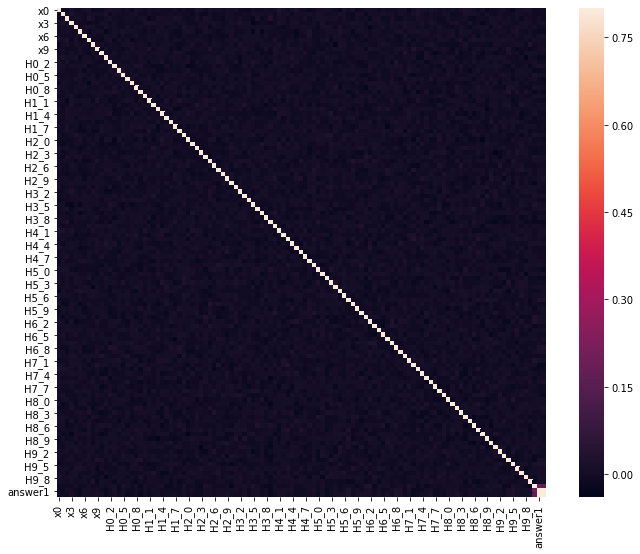

In [147]:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
###Data is fully random so there is no corrolation

In [148]:


scale = StandardScaler()
cols = ['answer0','answer1','answer2']
Y = df_train[cols]
X = df_train.drop(['answer0','answer1','answer2'],axis = 1)

X = scale.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# print(len(X[9999]))

In [149]:
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(3,activation='linear'))
# Compile model
#
model.compile(Adam(lr = 0.001), loss = 'mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 128)               14208     
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 387       
Total params: 14,595
Trainable params: 14,595
Non-trainable params: 0
_________________________________________________________________


In [150]:

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=150,batch_size=20,shuffle=True,verbose=0,callbacks=[earlystopper])

Epoch 00013: early stopping


In [151]:
model.evaluate(X_test, Y_test)
# model.evaluate(X_train, Y_train)

2000/2000 [==============================] - 0s 34us/step


[0.3949700207710266, 0.5017473101615906]

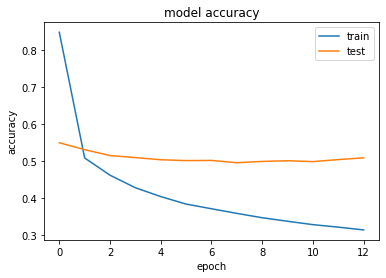

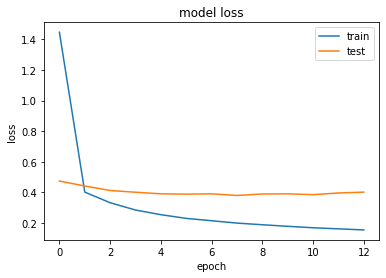

In [152]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [153]:

predictions = model.predict(X_test[:5])

print(predictions)
print(Y_test[:5])

[[2.4365327 3.88828   4.336148 ]
 [2.685084  3.8729842 4.4435067]
 [1.9809813 3.2833164 3.7839103]
 [3.4829204 3.740009  3.9191859]
 [2.6037    3.1513972 3.58244  ]]
       answer0   answer1   answer2
id                                
5350  2.854120  3.998749  4.558578
9291  2.565422  3.213494  3.549137
8252  2.553016  3.131433  3.570793
5875  1.168272  3.499438  4.346604
1036  1.911368  3.393577  3.449825


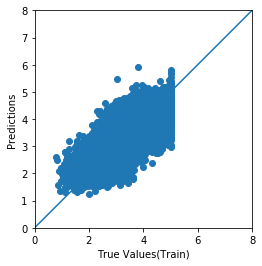

In [154]:
test_predictions = model.predict(X_train).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_train, test_predictions)
plt.xlabel('True Values(Train)')
plt.ylabel('Predictions')
lims = [0,8]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)


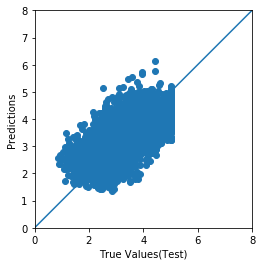

In [155]:

test_predictions = model.predict(X_test).flatten()

b = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values(Test)')
plt.ylabel('Predictions')
lims = [0,8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [156]:
print(X_test)
print(Y_test)
test_predictions = model.predict(X_test)
print(test_predictions)

[[-2.02233182  0.74619487 -0.62741424 ...  1.40005869  1.78764101
   0.28983991]
 [-0.68048598  2.40344856 -0.24592248 ... -0.61660254 -1.43747421
   0.31340119]
 [ 0.48627322 -0.01786069  0.30616146 ...  0.48038524 -0.8398297
   0.77078654]
 ...
 [-0.82042376  0.73211363  0.20974959 ... -0.49465543  0.67815553
  -0.29492122]
 [ 0.44195104  0.11926574  0.3665985  ... -1.97039696  1.11019187
   0.17709296]
 [-1.88639511 -0.1545064   0.53475472 ...  1.21952192  1.14055683
   0.79192911]]
       answer0   answer1   answer2
id                                
5350  2.854120  3.998749  4.558578
9291  2.565422  3.213494  3.549137
8252  2.553016  3.131433  3.570793
5875  1.168272  3.499438  4.346604
1036  1.911368  3.393577  3.449825
...        ...       ...       ...
9685  1.964732  3.466122  3.685307
8760  2.917431  3.397028  3.488547
4718  2.472819  2.911572  3.608795
6877  1.852963  3.604196  3.873649
3773  2.144877  3.592407  4.458668

[2000 rows x 3 columns]
[[2.4365327 3.88828   4.33614

In [157]:
import csv
with open('./TestData16dB.csv',mode='w') as TD:
  wr = csv.writer(TD) #, quoting=csv.QUOTE_ALL)
  wr.writerows(X_test)
with open('./TestDataPrediction16dB.csv',mode='w') as TDP:
    wr = csv.writer(TDP) #, quoting=csv.QUOTE_ALL)
    wr.writerows(test_predictions)   